# Stage 1.

Let `U_trunc` be the operator obtained by calculating the truncated unitary (i.e. with numeric_truncated unitary) and let `U_circ` be the operator obtained from the quantum circuit obtained by `direct_decomposition`. The objective of this section is to first verify that `U_trunc = U_circ` for a single beamsplitter, and then verify the same thing when an ancilla qubit is added.

In [4]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
sys.path.append('../') # Add parent directory to the system path
# from boson_sampling_probabilities import output_probability
# from simulation import run_interferom_simulation, dist_to_state

# from numeric_truncated_unitaries import numeric_truncated_unitary
from new_numeric_unitaries import numeric_truncated_unitary
from direct_decomposition import direct_decomposition
from random import random
from qiskit.quantum_info import Operator

## 1.0)
### Single beamsplitter (Pass)

theta_1 = 1.0223888828964898
phi_1 = 1.6826303763225754


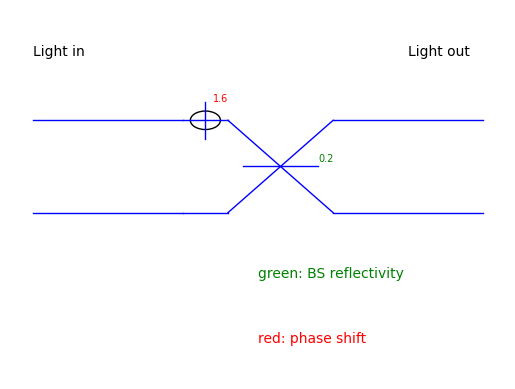

In [5]:
# Make single beamsplitter interferometer
I = itf.Interferometer()
theta_1 = np.pi/2 * random()
phi_1 = np.pi * random()

print(f"theta_1 = {theta_1}")
print(f"phi_1 = {phi_1}")

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)
I.add_BS(BS1)
I.draw()



In [12]:
U_BS = I.calculate_transformation() # Beamsplitter of the unitary

U_trunc = numeric_truncated_unitary(U_BS, 1)
# U_trunc = numeric_truncated_unitary(BS1.theta, BS1.phi, 1)
qc = direct_decomposition(U_BS, 1)
U_circ = Operator(qc)
np.allclose(U_trunc, U_circ)


False

## 1.1)
### Single beamsplitter with ancilla qubit (Failing)?

theta_1 = 0.20094635742577438
phi_1 = 1.592802474286502


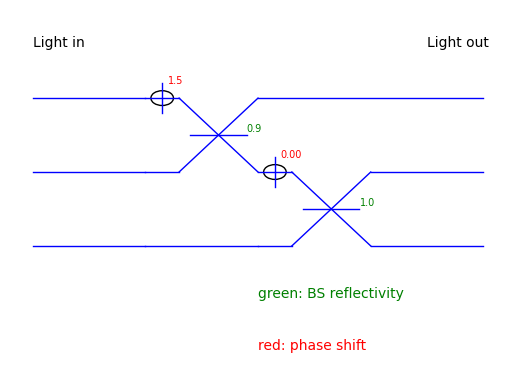

In [7]:
# Make single beamsplitter interferometer
I = itf.Interferometer()
theta_1 = np.pi/2 * random()
phi_1 = np.pi * random()
theta_2 = 0
phi_2 = 0

print(f"theta_1 = {theta_1}")
print(f"phi_1 = {phi_1}")

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)
BS2 = itf.Beamsplitter(2, 3, theta=theta_2, phi=phi_2)
I.add_BS(BS1)
I.add_BS(BS2)
I.draw()

In [8]:
def zero_close_elements(matrix, threshold=1e-10):
    """
    Sets elements in the complex matrix to zero if their magnitude is close to zero.
    
    Parameters:
    matrix (np.ndarray): A 2D numpy array with complex numbers.
    threshold (float): A small threshold value to determine what is considered close to zero.
    
    Returns:
    np.ndarray: A matrix with elements close to zero set to exactly zero.
    """
    real_close_to_zero = np.abs(matrix.real) < threshold
    imag_close_to_zero = np.abs(matrix.imag) < threshold
    
    matrix.real[real_close_to_zero] = 0
    matrix.imag[imag_close_to_zero] = 0
    
    return matrix

In [9]:
U_BS = I.calculate_transformation()
U_trunc = numeric_truncated_unitary(BS1.theta, BS1.phi, 1)
print(U_trunc)

TypeError: numeric_truncated_unitary() takes 2 positional arguments but 3 were given

In [ ]:
qc = direct_decomposition(I.calculate_transformation(), 1)
U_circ = Operator(qc)
U_circ = zero_close_elements(U_circ.data)
print(U_circ)

[[ 0.46487574+0.88537594j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.29063976-0.55353599j  0.        -0.78046553j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        -0.78046553j -0.29063976+0.55353599j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.46487574-0.88537594j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.46487574+0.88537594j  0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   

In [ ]:
print(qc)

global phase: 5.8344
       ┌──────────────────┐              ┌─────────────────┐            »
q_0: ──┤ U3(π/2,π/2,-π/2) ├────■─────────┤ U3(π/2,-π,-π/2) ├─────────■──»
     ┌─┴──────────────────┴─┐┌─┴─┐┌──────┴─────────────────┴──────┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,0) ├┤ X ├┤ U3(1.5721,1.7511e-06,-1.5695) ├┤ X ├»
     └──────────────────────┘└───┘└───────────────────────────────┘└───┘»
q_2: ───────────────────────────────────────────────────────────────────»
                                                                        »
«       ┌───────────────┐   ░  ░     ┌─────────────────────┐         »
«q_0: ──┤ U3(π/2,π/2,0) ├───░──░─────┤ U3(π/2,-π/2,1.5407) ├──────■──»
«     ┌─┴───────────────┴─┐ ░  ░ ┌───┴─────────────────────┴───┐┌─┴─┐»
«q_1: ┤ U3(1.5695,-π,π/2) ├─░──░─┤ U3(0.0013233,-π/2,-0.51357) ├┤ X ├»
«     └───────────────────┘ ░  ░ └─────────────────────────────┘└───┘»
«q_2: ──────────────────────░──░─────────────────────────────────────»
«                           ░  ░   